###Importing Dataset

In [43]:
import pandas as pd 
df1=pd.read_csv("/content/digit_svm.csv")
print(df1)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 7

###Info of data

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Columns: 785 entries, label to pixel783
dtypes: float64(409), int64(376)
memory usage: 34.3 MB


###Statistical data of given dataset

In [24]:
df1.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,5732.000000,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,...,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.0,5731.0,5731.0,5731.0,5731.0,5731.0,5731.0,5731.0,5731.0,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.0,5731.0,5731.0,5731.0,5731.0,5731.0,5731.0
mean,4.438765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014829,0.044662,0.065073,0.077809,0.109560,...,3.515268,2.470424,1.718199,1.272902,0.698307,0.233991,0.136276,0.024429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045018,0.142035,0.145175,0.100157,0.040482,0.235561,0.455069,0.677892,0.601117,0.723434,0.486303,0.285988,0.125284,0.153551,0.156517,0.029663,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.878433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.122705,3.341928,3.564612,2.842436,4.516574,...,25.461573,21.415925,18.271187,15.936661,11.771956,6.268473,5.191357,1.810122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.571097,5.202335,5.129003,4.005243,1.809062,6.346785,9.142418,11.697059,9.736136,11.473459,9.573338,7.149394,4.379471,5.348662,5.800864,1.757306,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.

###Checking for Null values

In [25]:
df1.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 785, dtype: int64

###Filling value in Null Values

In [26]:
df1.fillna(0, inplace=True)

###Info about Label

In [27]:
import numpy as np
order = list(np.sort(df1['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


####Visualising Label

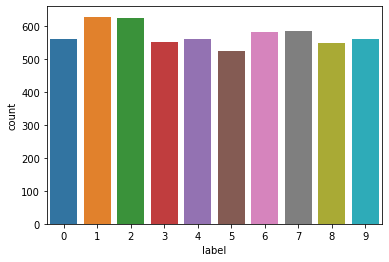

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns ## Visualizing the number of class and counts in the datasets

sns.countplot(x="label",data=df1)
plt.show()


####Visualizing the number of class and counts in the datasets

1    629
2    626
7    585
6    584
4    562
9    560
0    560
3    551
8    549
5    526
Name: label, dtype: int64

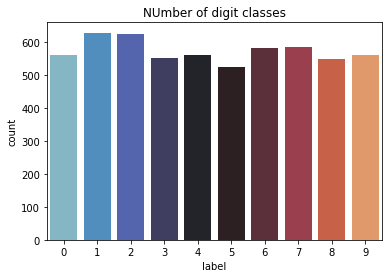

In [29]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( x="label",data=df1, palette = 'icefire')
plt.title('NUmber of digit classes')
df1.label.astype('category').value_counts()

###Divide into input and output variables

In [30]:
x=df1.iloc[:,1:-1]
y=df1.iloc[:,0]

###Train and test variables

In [31]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=0)

###Standardizing the Data

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
trainx=sc.fit_transform(trainx)
testx=sc.fit_transform(testx)

###Run a classifier and fit the model

In [33]:
from sklearn.svm import SVC
svc=SVC( kernel="rbf",random_state=0)
svc.fit(trainx,trainy)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

###Predicting the model

In [34]:
predy=svc.predict(testx)

###Checking Accuracy

In [46]:
from sklearn.metrics import accuracy_score
a=accuracy_score(testy,predy)
print("Accuracy score of SVM:",a)

Accuracy score of SVM: 0.9197907585004359


###Using another Classifier

####Running a Classifier and training the model

In [37]:
from sklearn.tree import DecisionTreeClassifier #Using decision tree classifier
dct=DecisionTreeClassifier()
dct.fit(trainx,trainy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

####Predicting using DecisionTreeClassifier

In [38]:
predy_dct=dct.predict(testx)

####Checking accuracy score Of DecisionTreeClassifier

In [47]:
b=accuracy_score(testy,predy_dct)
print("Accuracy score of DecisionTree classifier",b)

Accuracy score of DecisionTree classifier 0.5518744551002616


###Comparing accuracy of SVM and DecisionTree classifier

In [48]:
print("Accuracy score of SVM:",a)
print("Accuracy score of DecisionTree classifier",b)
max(a,b)

Accuracy score of SVM: 0.9197907585004359
Accuracy score of DecisionTree classifier 0.5518744551002616


0.9197907585004359

We see that Accuracy score is more with SVM as compared to DecisionTreeClassifer.So we should use SVM for better Model.

### Plotting some samples as well as converting into matrix

Text(0.5, 1.0, 'Digit')

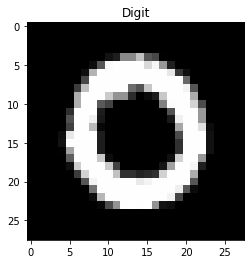

In [40]:
dig = df1.iloc[1, 1:]
dig.shape
dig = dig.values.reshape(28,28)
plt.imshow(dig, cmap='gray')
plt.title("Digit")

Text(0.5, 1.0, 'Digit')

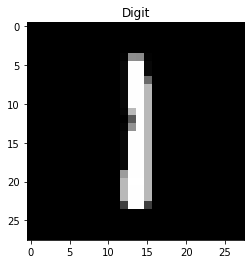

In [41]:
dig = df1.iloc[2, 1:]
dig.shape
dig = dig.values.reshape(28,28)
plt.imshow(dig, cmap='gray')
plt.title("Digit")

Text(0.5, 1.0, 'Digit')

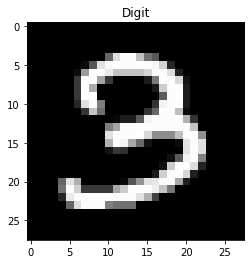

In [42]:
dig = df1.iloc[14, 1:]
dig.shape
dig = dig.values.reshape(28,28)
plt.imshow(dig, cmap='gray')
plt.title("Digit")